In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import torch
import matplotlib.pyplot as plt
from models.gen_glm import GeneratorGLM
from utils.plot_props import PlotProps
import numpy as np

%matplotlib inline

In [5]:
generator = torch.load('..//examples//cgan_results//SharedNoise_30N_run02_lam.1_temp.5//generator.pt')

In [19]:
real_glm_filters = np.load('..//dataset//GLM_2D_30n_shared_noise//W.npy')
real_glm_biases = np.load('..//dataset//GLM_2D_30n_shared_noise//bias.npy')
real_w_shared_noise = -.5

gen_glm_filters = generator.GLM.weight.detach().cpu().numpy().reshape(real_glm_filters.shape)
gen_glm_biases = generator.GLM.bias.detach().cpu().numpy()
gen_w_shared_noise = generator.shn_layer.weight.detach().cpu().numpy()



print(gen_glm_filters.shape, real_glm_filters.shape)

(30, 30, 40) (30, 30, 40)


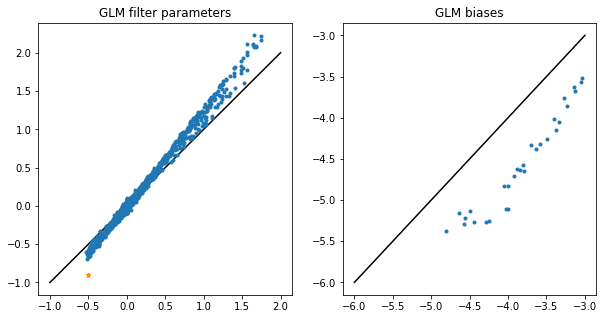

In [21]:
plot_props = PlotProps()

fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].set_title('GLM filter parameters')
ax[0].plot([-1, 2], [-1, 2], 'black')
ax[0].plot(real_glm_filters.flatten(), np.flip(gen_glm_filters, axis=(1, 2)).flatten(), '.')
ax[0].plot(real_w_shared_noise, gen_w_shared_noise, '*', markersize=5, label='Shared noise scale' )

ax[1].set_title('GLM biases')
ax[1].plot([-6, -3], [-6, -3], 'black')
ax[1].plot(real_glm_biases, gen_glm_biases, '.')
plt.show()